In [45]:
import torch
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
from auto_encoder import AutoEncoder
from masked_dataset import get_data, MaskedAutoencoderDataset
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%autoreload 2


In [46]:
train_set, val_set, test_set = get_data(dataset="CIFAR10", masking_ratio=0.1)

Files already downloaded and verified


In [47]:
batch_size = 12
train_loader = DataLoader(train_set, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_set, batch_size, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_set, batch_size, num_workers=4, pin_memory=True)


In [48]:
for masked_input, full_input, unmasked_indices in train_loader:
    print('image shape:', full_input.shape)
    full = full_input.reshape(batch_size, 3, 32, 32)
    masked = masked_input.reshape(batch_size, 3, 32, 32)
    break


image shape: torch.Size([12, 3, 1024])


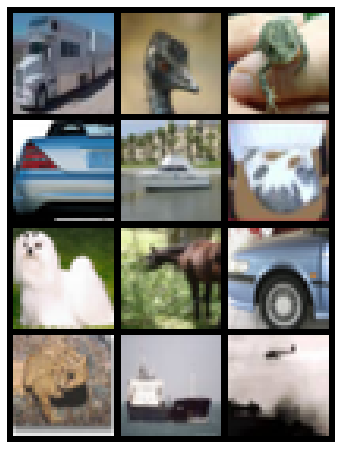

In [49]:
plt.figure(figsize=(16, 8))
plt.axis('off')
plt.imshow(make_grid(full, nrow=3).permute((1, 2, 0)))


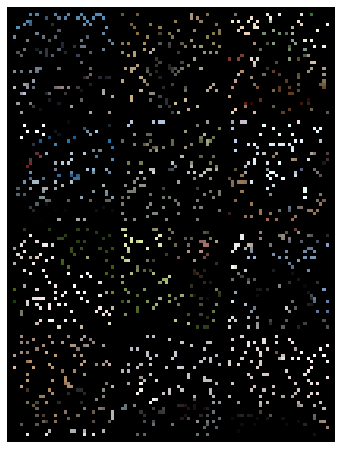

In [50]:
plt.figure(figsize=(16, 8))
plt.axis('off')
plt.imshow(make_grid(masked, nrow=3).permute((1, 2, 0)))
